# Amazon Product Scraping


The project goal is to build a web scraper that retrive information about products on Amazon by giving the search term and assemble them into a single CSV. The scraped data includes:
* Product description
* Price
* Image URL 
* Rating
* The total number of ratings

In this project I searched and scrapped the data of "mobile phone" in search.<br>
You can edit the "link" variable to include the URL of the Amazon page you want to scrape.




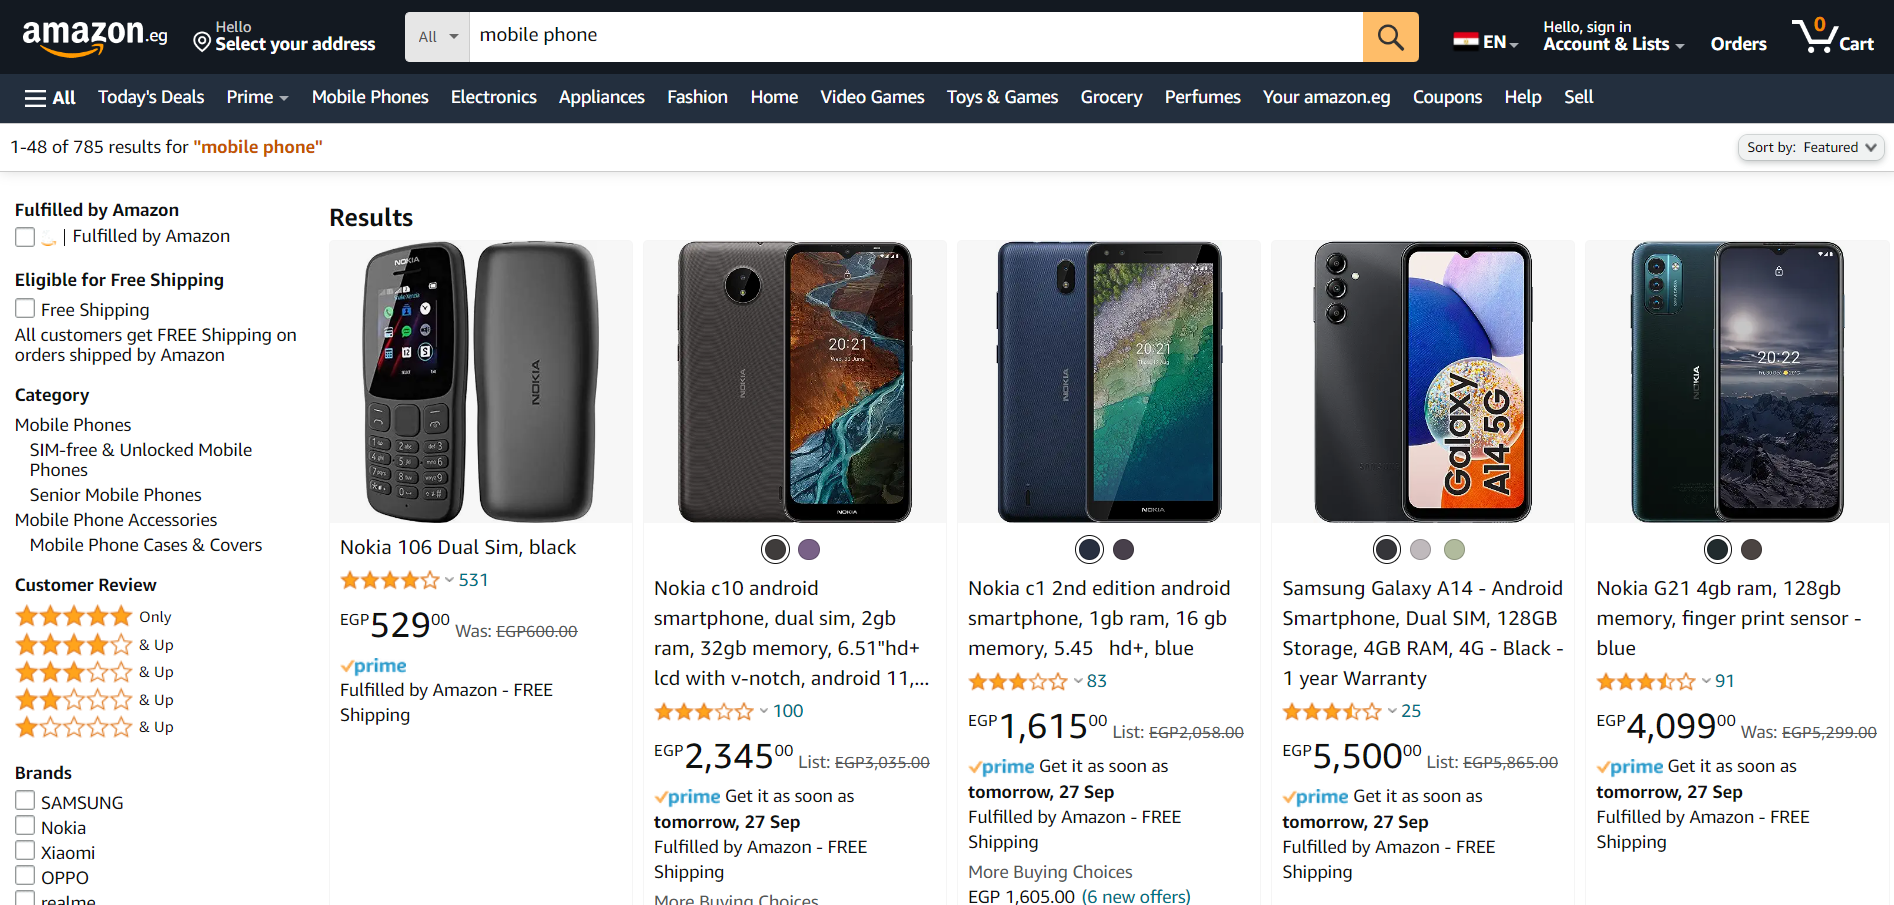

**Required Libraries:**
- Selenium
- Pandas
- Numpy

In [2]:
# first, install Selenium library
# !pip install selenium 

     ---------------------------------------- 9.5/9.5 MB 1.1 MB/s eta 0:00:00
  Using cached trio_websocket-0.10.4-py3-none-any.whl (17 kB)
  Using cached trio-0.22.2-py3-none-any.whl (400 kB)
  Using cached outcome-1.2.0-py2.py3-none-any.whl (9.7 kB)
  Using cached exceptiongroup-1.1.3-py3-none-any.whl (14 kB)
  Using cached wsproto-1.2.0-py3-none-any.whl (24 kB)
  Using cached h11-0.14.0-py3-none-any.whl (58 kB)


In [3]:
from selenium import webdriver
import pandas as pd
import numpy as np

## Gathering Data

In [4]:
#First we use webdriver to get instance for getting the website info
driverScraper = webdriver.Chrome()

# get the url from the user
link = "https://www.amazon.eg/s?k=mobile+phone&language=en_AE&crid=BXSLPHDK1JGN&sprefix=mo%2Caps%2C177&ref=nb_sb_ss_ts-doa-p_2_2"  
# you can customize this link based on user search.

# pass the url for the driver
driverScraper.get(link) 

In [5]:
# scrape the search elements from the web page
gatheredItems = driverScraper.find_elements("xpath",'//div/div[@class="a-section a-spacing-base"]')

And here we scraped every single product separated in **gatheredItems** list in the format of selenium objects.<br>
Then, we will get the info of eevery single element(product). 

In [6]:
# check the gathered products
print(len(gatheredItems))

60


In [7]:
itemsList = []

# get the product data from the big product element (Product Name - Product Price - Rating - Product Total Rates - Img. URL)

for element in gatheredItems:
    try:
        itemName = element.find_element("xpath",'.//span[@class="a-size-base-plus a-color-base a-text-normal"]').text
    except:
        itemName = np.nan
    
    try:
        itemPrice = element.find_element("xpath",'.//span[@class="a-price-whole"]').text
    except:
        itemPrice = "Out Of Stock"

    try:
        itemRating = element.find_element("xpath",'.//div[@class="a-row a-size-small"]/span').get_attribute("aria-label")
        itemRating = itemRating.split()[0]
    except:
        itemRating = np.nan
    
    try:
        itemTotalRates = element.find_element("xpath",'.//span[@class="a-size-base s-underline-text"]').text
    except:
        itemTotalRates = np.nan
    
    try:
        itemImgURL = element.find_element("xpath",'.//img[@class="s-image"]').get_attribute("src")
    except:
        itemImgURL = np.nan

    itemsList.append([itemName, itemPrice, itemRating, itemTotalRates, itemImgURL]) 
        
    

In [8]:
# testing : check that the products scrapped and handled well

print(f'Prouduct Name: {itemsList[0][0]}')
print(f'Prouduct Price: {itemsList[0][1]}')
print(f'Prouduct Rating: {itemsList[0][2]}')
print(f'Prouduct Total Rates: {itemsList[0][3]}')
print(f'Prouduct Image url: {itemsList[0][4]}')

print("----------------------------------------------")
# testing : recheck the number of scrapped products that handled
print(f'Numbers of handled scrapped prouducts = {len(itemsList)}')


Prouduct Name: USNASLM Universal Car Phone Holder 360 Degree Rotating Flexible Mount Stand, for IPhone12 Easy One-Button Switch Car Mobile Phone Bracket
Prouduct Price: 96
Prouduct Rating: 2.8
Prouduct Total Rates: 8
Prouduct Image url: https://m.media-amazon.com/images/I/51-ZvncRO2L._AC_UL320_.jpg
----------------------------------------------
Numbers of handled scrapped prouducts = 60


- Total scrapped products handled well

## Load data into Data Frame

In [9]:
# create a data frame that get the data from the mobile lists
ProductTable = pd.DataFrame(itemsList, columns= ['Poduct Description', 'Price', 'Rating', 'TotalRates', 'ImgURL'])
ProductTable.index = pd.Index(range(1, len(ProductTable)+1))

In [10]:
ProductTable.head(10)

,Poduct Description,Price,Rating,TotalRates,ImgURL
1,USNASLM Universal Car Phone Holder 360 Degree ...,96,2.8,8,https://m.media-amazon.com/images/I/51-ZvncRO2...
2,Compatible with QCY T18 Mobile Phone Silicone ...,86,NaN,NaN,https://m.media-amazon.com/images/I/41vkUmscUJ...
3,"Firacer 18 in-1 Electronic Cleaning kit, with ...",299,4.5,43,https://m.media-amazon.com/images/I/81g5oNt5DW...
4,"Bluetooth Earbuds Cleaning Brush 5 in 1,in-Ear...",200,4.4,339,https://m.media-amazon.com/images/I/51-MAa8o1+...
5,"Nokia 106 Dual Sim, black",529,3.8,531,https://m.media-amazon.com/images/I/61rTSeWyUp...
6,"Nokia c1 2nd edition android smartphone, 1gb r...","1,615",2.8,83,https://m.media-amazon.com/images/I/81ejU1gSrx...
7,"Nokia G21 4gb ram, 128gb memory, finger print ...","4,099",3.5,91,https://m.media-amazon.com/images/I/71AQ3qEZ-V...
8,"Samsung Galaxy A03, Dual SIM, 4GB RAM, 64GB St...","3,999",4.0,3,https://m.media-amazon.com/images/I/61oVY9YzPY...
9,"Samsung Galaxy A14 4G Android Smartphone, Dual...","4,999",3.4,19,https://m.media-amazon.com/images/I/81L701E6pi...
10,"Nokia 106 Series 30, Cell Phone - Black",530,3.0,25,https://m.media-amazon.com/images/I/61aw5ZVzYc...


## Save into CSV

In [11]:
ProductTable.to_csv('Amazon Products.csv', index=False, encoding='utf-8-sig')